# Modeling

## Hans

## Annie

## Sileshi

In [1]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error 
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2]:
# Loading dataset
df = pd.read_csv('../Data/salary_cleaned.csv')
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,year,month,year_month,timestamp_3mos,year_month_3mos,state_short,inflation_rate,inflation_rate_3mos,state,employment_rate,employment_rate_3mos
0,2018-06-03 13:58:20,Yahoo,IC2,Software Engineer,160.5,"Sunnyvale, CA",0.58,0.58,Full Stack,2018,6,2018-06,2018-03-03 13:58:20,2018-03,CA,0.029,0.024,California,0.957660,0.956797
1,2018-06-04 20:28:22,Facebook,E3,Software Engineer,165.0,"Seattle, WA",1.00,1.00,Full Stack,2018,6,2018-06,2018-03-04 20:28:22,2018-03,WA,0.029,0.024,Washington,0.955998,0.954978
2,2018-06-05 00:56:33,VmWare,Senior MTS,Software Engineer,218.0,"Palo Alto, CA",8.00,1.00,Distributed Systems (Back-End),2018,6,2018-06,2018-03-05 00:56:33,2018-03,CA,0.029,0.024,California,0.957660,0.956797
3,2018-06-05 01:19:05,Uber,L4,Software Engineer,240.0,"San Francisco, CA",3.00,0.00,Web Development (Front-End),2018,6,2018-06,2018-03-05 01:19:05,2018-03,CA,0.029,0.024,California,0.957660,0.956797
4,2018-06-05 07:13:17,Capital One,Master Software Engineer,Software Engineer,196.0,"New York, NY",8.00,2.00,iOS,2018,6,2018-06,2018-03-05 07:13:17,2018-03,NY,0.029,0.024,New York,0.959053,0.955962


In [3]:
features = ['yearsofexperience', 'yearsatcompany','inflation_rate', 'inflation_rate_3mos', 'employment_rate',
       'employment_rate_3mos']
X = df[features]
y = df['totalyearlycompensation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [4]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (19596, 6)
X_test: (4900, 6)
y_train: (19596,)
y_test: (4900,)


In [5]:
# Poly testing
poly = PolynomialFeatures(interaction_only=True,include_bias=False)

X_train_pf = poly.fit_transform(X_train)


X_test_pf = poly.transform(X_test)

In [6]:
# Standard Scaler

ss= StandardScaler()
Z_train = ss.fit_transform(X_train_pf)
Z_test = ss.transform(X_test_pf)

In [7]:
X_train.columns

Index(['yearsofexperience', 'yearsatcompany', 'inflation_rate',
       'inflation_rate_3mos', 'employment_rate', 'employment_rate_3mos'],
      dtype='object')

### 1. Linear Regression


In [8]:
# Linear Regression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [9]:
lr.score(X_train,y_train), lr.score(X_test,y_test)


(0.2295704999269983, 0.2260154506896519)

In [10]:
def display_R2_scores(model, X_train, y_train, X_test, y_test):
    print(f'The mean cross validation score for this model is {round(cross_val_score(model, X_train, y_train).mean(),4)}.')
    print(f'The training score for this model is {round(model.score(X_train, y_train), 4)}.')
    print(f'The testing score for this model is {round(model.score(X_test, y_test),4)}.')

In [11]:
display_R2_scores(lr, X_train, y_train, X_test, y_test)

The mean cross validation score for this model is 0.2323.
The training score for this model is 0.2296.
The testing score for this model is 0.226.


In [12]:
lr_preds = lr.predict(X_test)

In [13]:
feature_coeflst = [f'{X.columns[i]}: {lr.coef_[i]}' for i in range(0, len(X.columns))]
feature_coeflst

['yearsofexperience: 11.246997696289334',
 'yearsatcompany: -4.478560378858596',
 'inflation_rate: 2499.7318455318095',
 'inflation_rate_3mos: 2033.2234135442338',
 'employment_rate: -408.10650688292515',
 'employment_rate_3mos: -120.88647998457434']

In [14]:
pd.DataFrame(list(zip(X.columns, lr.coef_)), columns=['features', 'coefficients']).sort_values(by='coefficients', ascending=False).head()

,features,coefficients
2,inflation_rate,2499.731846
3,inflation_rate_3mos,2033.223414
0,yearsofexperience,11.246998
1,yearsatcompany,-4.478560
5,employment_rate_3mos,-120.886480


In [15]:
pd.DataFrame(list(zip(X.columns, lr.coef_)), columns=['features', 'coefficients']).sort_values(by='coefficients', ascending=False).tail()

,features,coefficients
3,inflation_rate_3mos,2033.223414
0,yearsofexperience,11.246998
1,yearsatcompany,-4.478560
5,employment_rate_3mos,-120.886480
4,employment_rate,-408.106507


In [16]:
intercept = lr.intercept_
intercept

587.2933234765875

/Users/sileshihirpa/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


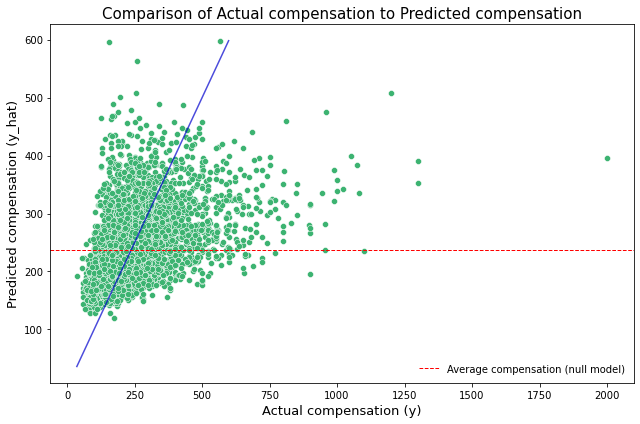

In [17]:
plt.figure(figsize = (9, 6))
sns.scatterplot(x = y_test, y = lr.predict(X_test), color = 'mediumseagreen')
plt.title('Comparison of Actual compensation to Predicted compensation', fontdict = {'fontsize':15})
maxDist = max(max(lr.predict(X_test)), max(lr.predict(X_test))) 
minDist = min(min(lr.predict(X_test)), min(y_test)) 
sns.lineplot((minDist, maxDist), (minDist, maxDist), color = 'mediumblue', alpha = 0.7) # Similar to Mahdi's code, but done with Seaborn
plt.xlabel('Actual compensation (y)', fontdict= {'fontsize':13})
plt.axhline(df['totalyearlycompensation'].mean(), linewidth=1, linestyle='dashed', color='r', label='Average compensation (null model)')
plt.ylabel('Predicted compensation (y_hat)', fontdict= {'fontsize':13})
plt.legend(frameon=False, loc='lower right')

plt.tight_layout();

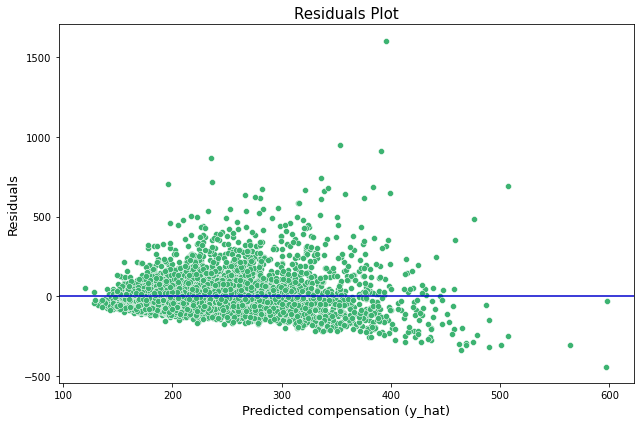

In [18]:
# Residuals Plot

resids = y_test - lr.predict(X_test)

plt.figure(figsize=(9,6))
sns.scatterplot(x = lr.predict(X_test), y = resids, color = 'mediumseagreen')
plt.axhline(0, color = 'mediumblue')
plt.title('Residuals Plot', fontdict = {'fontsize':15})
plt.xlabel('Predicted compensation (y_hat)', fontdict = {'fontsize':13})
plt.ylabel('Residuals', fontdict = {'fontsize':13})
#plt.savefig('./images/residueScatter.png')
plt.tight_layout();

### 2. Lasso


In [19]:
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso
 
# Train the model
lasso = Lasso(alpha = 1)
lasso.fit(X_train, y_train)
y_pred1 = lasso.predict(X_test)
 
# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = X_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
 
print(lasso_coeff)

# Code from https://www.geeksforgeeks.org/implementation-of-lasso-ridge-and-elastic-net/

Mean squared error on test set 13809.110833241602
                Columns  Coefficient Estimate
0     yearsofexperience             11.155741
1        yearsatcompany             -4.380376
2        inflation_rate              0.000000
3   inflation_rate_3mos              0.000000
4       employment_rate             -0.000000
5  employment_rate_3mos              0.000000


In [20]:
lasso.score(X_train, y_train), lasso.score(X_test, y_test)


(0.2168227368518829, 0.21530352879251047)

---

In [21]:
# Lasso

l_alphas = np.logspace(0,5,100)

lasso_cv = LassoCV(alphas=l_alphas, cv=5, n_jobs=-1)

lasso_cv.fit(X_train, y_train);

In [22]:
display_R2_scores(lasso_cv, X_train, y_train, X_test, y_test)

The mean cross validation score for this model is 0.2194.
The training score for this model is 0.2168.
The testing score for this model is 0.2153.


In [23]:
lasso_cv.alpha_

1.0

In [24]:
lasso_cv.score(X_train, y_train), lasso_cv.score(X_test, y_test)


(0.2168227368518829, 0.21530352879251047)

In [25]:
lasso_preds = lasso_cv.predict(X_test)

### 3. Ridge

In [26]:
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(X_train, y_train)
y_pred = ridgeR.predict(X_test)
 
# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(f'Ridge MSE: {mean_squared_error_ridge}\n')
 
# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= X_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print('       Coeffiecients ', ridge_coefficient)

Ridge MSE: 13720.975530977219

       Coeffiecients                  Columns  Coefficient Estimate
0     yearsofexperience             11.242366
1        yearsatcompany             -4.503430
2        inflation_rate            522.867492
3   inflation_rate_3mos            589.969127
4       employment_rate           -144.523487
5  employment_rate_3mos             65.259882


In [27]:
ridgeR.score(X_train, y_train) , ridgeR.score(X_test, y_test)


(0.22382705905099654, 0.22031177744159636)

---

In [28]:
# Ridge

r_alphas = np.logspace(0,5,100)

ridge_cv = RidgeCV(alphas = r_alphas, scoring='r2', cv=5)

ridge_cv.fit(X_train, y_train);

In [29]:
display_R2_scores(ridge_cv, X_train, y_train, X_test, y_test)

The mean cross validation score for this model is 0.2258.
The training score for this model is 0.2238.
The testing score for this model is 0.2203.


In [30]:
ridge_cv.alpha_


1.0

In [31]:
ridge_cv.score(X_train, y_train) , ridge_cv.score(X_test, y_test)


(0.22382705905099654, 0.22031177744159636)

In [32]:
ridge_preds = ridge_cv.predict(X_test)


### 4. Elastic Net


In [33]:
# import model
from sklearn.linear_model import ElasticNet
 
# Train the model
e_net = ElasticNet(alpha = 1)
e_net.fit(X_train, y_train)
 
# calculate the prediction and mean square error
y_pred_elastic = e_net.predict(X_test)
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
print("Mean Squared Error on test set", mean_squared_error)
 
e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = X_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff

Mean Squared Error on test set 13811.505026874514


,Columns,Coefficient Estimate
0,yearsofexperience,10.911558
1,yearsatcompany,-4.010676
2,inflation_rate,0.000000
3,inflation_rate_3mos,0.000000
4,employment_rate,-0.000000
5,employment_rate_3mos,0.000000


In [34]:
e_net.score(X_train, y_train), e_net.score(X_test, y_test)


(0.21664623146051032, 0.21516747982325957)

---

In [35]:
# Elastic Net
e_alphas = np.logspace(0,5,100)

elastic_cv = ElasticNetCV(alphas = e_alphas, cv=5)

elastic_cv.fit(X_train, y_train);

In [36]:
elastic_cv.score(X_train, y_train), elastic_cv.score(X_test, y_test)


(0.21664623146051032, 0.21516747982325957)

In [37]:
display_R2_scores(elastic_cv, X_train, y_train, X_test, y_test)

The mean cross validation score for this model is 0.2193.
The training score for this model is 0.2166.
The testing score for this model is 0.2152.


In [38]:
elastic_preds = elastic_cv.predict(X_test)


In [39]:
mse = np.mean((elastic_preds - y_test)**2)

In [40]:
X_train.columns

Index(['yearsofexperience', 'yearsatcompany', 'inflation_rate',
       'inflation_rate_3mos', 'employment_rate', 'employment_rate_3mos'],
      dtype='object')

---

### 5. RMSE


In [41]:

print('RMSE for Linear Regression: ', metrics.mean_squared_error(y_test,lr_preds,squared=False))
print('RMSE for LASSO Regression: ', metrics.mean_squared_error(y_test,lasso_preds,squared=False))
print('RMSE for Ridge Regression: ', metrics.mean_squared_error(y_test,ridge_preds,squared=False))
print('RMSE for Elastic Net: ', metrics.mean_squared_error(y_test,elastic_preds,squared=False))

RMSE for Linear Regression:  116.70733535998488
RMSE for LASSO Regression:  117.51217312790021
RMSE for Ridge Regression:  117.13656786408427
RMSE for Elastic Net:  117.52235968901623


In [48]:
print(f"Linear regression; train score: {lr.score(X_train,y_train)} and test score: {lr.score(X_test,y_test)}")
print(f"Lasso Reg.; train score: {lasso.score(X_train, y_train)} and test score: {lasso.score(X_test, y_test)}")
print(f"With Ridge;  train score: {ridgeR.score(X_train, y_train)} and test score: {ridgeR.score(X_test, y_test)}")
print(f"Elastic net; train score: {e_net.score(X_train, y_train)} and test score: {e_net.score(X_test, y_test)}")
print()

print('RMSE for Linear Regression: ', metrics.mean_squared_error(y_test,lr_preds,squared=False))
print('RMSE for LASSO Regression: ', metrics.mean_squared_error(y_test,lasso_preds,squared=False))
print('RMSE for Ridge Regression: ', metrics.mean_squared_error(y_test,ridge_preds,squared=False))
print('RMSE for Elastic Net: ', metrics.mean_squared_error(y_test,elastic_preds,squared=False))

Linear regression; train score: 0.2295704999269983 and test score: 0.2260154506896519
Lasso Reg.; train score: 0.2168227368518829 and test score: 0.21530352879251047
With Ridge;  train score: 0.22382705905099654 and test score: 0.22031177744159636
Elastic net; train score: 0.21664623146051032 and test score: 0.21516747982325957

RMSE for Linear Regression:  116.70733535998488
RMSE for LASSO Regression:  117.51217312790021
RMSE for Ridge Regression:  117.13656786408427
RMSE for Elastic Net:  117.52235968901623


## Final Score

|**Model**|**Training R^2 Score**|**Testing R^2 Score**|**RMSE**|
|--|--|--|--|
|**Linear Regression**||||
|**Lasso**||||
|**Ridge**||||
|**Elastic Net**||||

## Mason

In [1]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, Normalizer, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
import category_encoders as ce

In [2]:
# Loading dataset
df = pd.read_csv('../Data/salary_cleaned.csv')
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,year,month,year_month,timestamp_3mos,year_month_3mos,state_short,inflation_rate,inflation_rate_3mos,state,employment_rate,employment_rate_3mos
0,2018-06-03 13:58:20,Yahoo,IC2,Software Engineer,160.5,"Sunnyvale, CA",0.58,0.58,Full Stack,2018,6,2018-06,2018-03-03 13:58:20,2018-03,CA,0.029,0.024,California,0.957660,0.956797
1,2018-06-04 20:28:22,Facebook,E3,Software Engineer,165.0,"Seattle, WA",1.00,1.00,Full Stack,2018,6,2018-06,2018-03-04 20:28:22,2018-03,WA,0.029,0.024,Washington,0.955998,0.954978
2,2018-06-05 00:56:33,VmWare,Senior MTS,Software Engineer,218.0,"Palo Alto, CA",8.00,1.00,Distributed Systems (Back-End),2018,6,2018-06,2018-03-05 00:56:33,2018-03,CA,0.029,0.024,California,0.957660,0.956797
3,2018-06-05 01:19:05,Uber,L4,Software Engineer,240.0,"San Francisco, CA",3.00,0.00,Web Development (Front-End),2018,6,2018-06,2018-03-05 01:19:05,2018-03,CA,0.029,0.024,California,0.957660,0.956797
4,2018-06-05 07:13:17,Capital One,Master Software Engineer,Software Engineer,196.0,"New York, NY",8.00,2.00,iOS,2018,6,2018-06,2018-03-05 07:13:17,2018-03,NY,0.029,0.024,New York,0.959053,0.955962


In [5]:
# Converting Year and Month to string 
df['year'] = df['year'].astype(str)
df['month'] = df['month'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24496 entries, 0 to 24495
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                24496 non-null  object 
 1   company                  24496 non-null  object 
 2   level                    24496 non-null  object 
 3   title                    24496 non-null  object 
 4   totalyearlycompensation  24496 non-null  float64
 5   location                 24496 non-null  object 
 6   yearsofexperience        24496 non-null  float64
 7   yearsatcompany           24496 non-null  float64
 8   tag                      24496 non-null  object 
 9   year                     24496 non-null  object 
 10  month                    24496 non-null  object 
 11  year_month               24496 non-null  object 
 12  timestamp_3mos           24496 non-null  object 
 13  year_month_3mos          24496 non-null  object 
 14  state_short           

In [6]:
# Features and target variable
features = ['company', 'title', 'yearsofexperience', 'yearsatcompany', 'year', 'month', 'state_short', 'inflation_rate', 'inflation_rate_3mos', 'employment_rate', 'employment_rate_3mos']

X = df[features]
y = df['totalyearlycompensation']

In [8]:
# Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

In [9]:
# ColumnTransformer
ct = ColumnTransformer([
    ('sc', StandardScaler(), make_column_selector(dtype_exclude=object)),
    ('encoder', OneHotEncoder(handle_unknown='ignore'), ['company', 'title', 'state_short', 'year', 'month'])],
    n_jobs=-1,
    remainder='passthrough')

In [10]:
X_train_ct = ct.fit_transform(X_train)
X_test_ct = ct.transform(X_test)

In [11]:
X_train_ct.shape

(18372, 1234)

In [12]:
X_test_ct.shape

(6124, 1234)

#### RandomForest Regression

In [16]:
# Instantiate RandomForestRegression
rf = RandomForestRegressor()

# Parameters
rf_params={
    'n_estimators':[100, 200],
    'criterion': ['mse'],
    'max_depth': [2, 5],
    'min_samples_split': [2,4],
    'min_samples_leaf': [1,3],
    'random_state': [42]
}

# Instantiating RFR Gridsearch
rf_gs = GridSearchCV(rf, rf_params, cv=5, verbose=1, n_jobs=-1)

# Fitting GridSearch to the data
rf_gs.fit(X_train_ct, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


KeyboardInterrupt: 

In [ ]:
# Train/Test Scores
print(f'Best Train Score: {rf_gs.best_score_}')
print(f'Best Test Score: {rf_gs. score(X_test_ct, y_test)}')

# Best Parameters
print(f'Best parameters: {rf_gs.best_params_}')

# Best Estimators
print(f'Best Estimators: {rf_gs.best_estimator_}')

#### AdaBoost Regression

In [14]:
# Instantiate AdaBoostRegressor
abr = AdaBoostRegressor()

# Parameters
abr_params ={
    'base_estimator': [None],
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [1, 3],
    'loss': ['linear', 'square', 'exponential'],
    'random_state': [42]
}

# Instantiate ABR GridSearch
abr_gs = GridSearchCV(abr, abr_params, cv=5, verbose=1, n_jobs=-1)

# Fitting Gridsearch to the data
abr_gs.fit(X_train_ct, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


KeyboardInterrupt: 

In [ ]:
# Train/Test Scores
print(f'Best Train Score: {rf_gs.best_score_}')
print(f'Best Test Score: {rf_gs.score(X_test_ct, y_test)}')

# Best Parameters
print(f'Best parameters: {rf_gs.best_params_}')

# Best Estimators
print(f'Best Estimators: {rf_gs.best_estimator_}')